In [1]:
import pandas as pd
import numpy as np
import requests as req
import bs4

## Data Scraping

In [2]:
res = req.get('https://www.worldometers.info/coronavirus/')

In [3]:
type(res)


requests.models.Response

'<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Coronavirus Update (Live): 655,650 Cases and 30,388 Deaths from COVID-19 Virus Outbreak - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, and death toll by country due to the COVID 19 coronavirus from Wuhan, China. Coronavirus counter with new cases, historical data, and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/appl
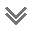

In [4]:
res.text

In [5]:
soup=bs4.BeautifulSoup(res.content,'html.parser')

In [6]:
type(soup)

bs4.BeautifulSoup

In [7]:
table=soup.select("table")

In [8]:
table

[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%">
 <thead>
 <tr>
 <th width="100">Country,<br>Other</br></th>
 <th width="20">Total<br>Cases</br></th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">1<sup>st</sup><br/>case</th>
 </tr>
 </thead>
 <tbody>
 <tr style="">
 <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>
 <td style="font-weight: bold; text-align:right">118,592</td>
 <td style="font-weight: bold; text-align:right;background-color:#FFEEAA;">+14,466</td>
 <td style="font-weight: bold; text-align:right;">1,979 </td>
 <td style="font-weight: bold; text-align:right;back

In [9]:
 tab=soup.find_all('table',id='main_table_countries_today')

In [10]:
tab

[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%">
 <thead>
 <tr>
 <th width="100">Country,<br>Other</br></th>
 <th width="20">Total<br>Cases</br></th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">1<sup>st</sup><br/>case</th>
 </tr>
 </thead>
 <tbody>
 <tr style="">
 <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>
 <td style="font-weight: bold; text-align:right">118,592</td>
 <td style="font-weight: bold; text-align:right;background-color:#FFEEAA;">+14,466</td>
 <td style="font-weight: bold; text-align:right;">1,979 </td>
 <td style="font-weight: bold; text-align:right;back

In [11]:
len(tab)

1

In [12]:
type(tab)

bs4.element.ResultSet

In [13]:
tab=tab[0]

In [14]:
for h in tab.find_all('th'):
    print(h.text)  
    for row in tab.find_all('tr'):
        for cell in row.find_all('td'):
            print(cell.text)


Country,Other
USA
118,592
+14,466
1,979 
+283
3,224
113,389
2,666
358
6

Jan 20 
Italy
92,472
+5,974
10,023 
+889
12,384
70,065
3,856
1,529
166

Jan 29 
Spain
72,248
+6,529
5,812 
+674
12,285
54,151
4,165
1,545
124

Jan 30 
Germany
57,695
+6,824
430 
+79
8,481
48,784
1,581
689
5

Jan 26 
France
37,575
+4,611
2,314 
+319
5,700
29,561
4,273
576
35

Jan 23 
Iran
35,408
+3,076
2,517 
+139
11,679
21,212
3,206
422
30

Feb 18 
UK
17,089
+2,546
1,019 
+260
135
15,935
163
252
15

Jan 30 
Switzerland
14,076
+1,148
264 
+33
1,530
12,282
301
1,626
31

Feb 24 
Netherlands
9,762
+1,159
639 
+93
3
9,120
761
570
37

Feb 26 
S. Korea
9,478
+146
144 
+5
4,811
4,523
59
185
3

Jan 19 
Belgium
9,134
+1,850
353  
+64
1,063
7,718
789
788
30

Feb 03 
Austria
8,188
+491
68 
+10
225
7,895
128
909
8

Feb 24 
Turkey
7,402
+1,704
108 
+16
70
7,224
309
88
1

Mar 09 
Canada
5,526
+769
55 

354
5,117
120
146
1

Jan 24 
Portugal
5,170
+902
100 
+24
43
5,027
89
507
10

Mar 01 
Norway
3,998
+227
22 
+3
7
3,969
84
737
4


Moldova
231
+32
2 

2
227
33
57
0.5

Mar 06 
Kazakhstan
228
+78
1 

16
211

12
0.05

Mar 12 
San Marino
224
+1
22 
+1
6
196
16
6,602
648

Feb 26 
Burkina Faso
207
+27
11 
+2
21
175

10
0.5

Mar 08 
Albania
197
+11
10 
+2
31
156
3
68
3

Mar 07 
Réunion
183
+38
 

1
182

204


Mar 10 
Azerbaijan
182
+17
4 
+1
15
163
23
18
0.4

Feb 27 
Cyprus
179
+17
5 

15
159
3
148
4

Mar 08 
Vietnam
174
+11
 

21
153
3
2


Jan 22 
Faeroe Islands
155
+11
 

54
101
2
3,172


Mar 03 
Oman
152
+21
 

23
129

30


Feb 23 
Malta
149
+10
 

2
147
1
337


Mar 06 
Ghana
141
+4
5 
+1
2
134
1
5
0.2

Mar 11 
Senegal
130
+11
 

18
112

8


Mar 01 
Brunei 
120
+5
1 
+1
25
94
1
274
2

Mar 08 
Cuba
119
+39
3 
+1
4
112
2
11
0.3

Mar 10 
Venezuela
113

2 

39
72
2
4
0.07

Mar 12 
Sri Lanka
113
+7
1 
+1
9
103
5
5
0.05

Jan 26 
Afghanistan
110

4 

2
104

3
0.1

Feb 23 
Uzbekistan
104
+16
2 
+1
5
97
8
3
0.06

Mar 14 
Guadeloupe
102
+29
2 
+1
17
83
4
255
5

Mar 12 
Mauritius
102
+8
2 


100
1
80
2

Mar 17 
Ivory Coast
101



2


Mar 17 
Barbados
26

 


26

90


Mar 16 
Madagascar
26

 


26

0.9


Mar 19 
Togo
25

1 

1
23

3
0.1

Mar 05 
Uganda
23

 


23

0.5


Mar 20 
El Salvador
19
+6
 


19

3


Mar 18 
Mali
18
+7
 


18

0.9


Mar 24 
Bermuda
17

 

2
15

273


Mar 17 
Ethiopia
16

 

1
15

0.1


Mar 12 
Maldives
16

 

9
7

30


Mar 06 
New Caledonia
15

 


15

53


Mar 17 
Tanzania
14
+1
 

1
13

0.2


Mar 15 
Djibouti
12

 


12

12


Mar 17 
Equatorial Guinea
12

 


12

9


Mar 13 
Mongolia
12
+1
 


12

4


Mar 09 
Dominica
11

 


11

153


Mar 21 
Saint Martin
11

 


11

284


Feb 29 
Niger
10

1 


9

0.4
0.04

Mar 18 
Bahamas
10

 

1
9

25


Mar 14 
Greenland
10

 

2
8

176


Mar 15 
Eswatini
9

 


9

8


Mar 13 
Cayman Islands
8

1 


7

122
15

Mar 12 
Curaçao
8

1 

2
5

49
6

Mar 12 
Guyana
8
+3
1 


7

10
1

Mar 11 
Guinea
8

 


8

0.6


Mar 12 
Haiti
8

 


8

0.7


Mar 19 
Laos
8
+2
 


8

1


Mar 23 
Mozambique
8
+1
 


8

0.3


Mar 21 
Myanmar
8

 


8

0.1


Mar 22 
Namibi

55


Feb 23 
Moldova
231
+32
2 

2
227
33
57
0.5

Mar 06 
Kazakhstan
228
+78
1 

16
211

12
0.05

Mar 12 
San Marino
224
+1
22 
+1
6
196
16
6,602
648

Feb 26 
Burkina Faso
207
+27
11 
+2
21
175

10
0.5

Mar 08 
Albania
197
+11
10 
+2
31
156
3
68
3

Mar 07 
Réunion
183
+38
 

1
182

204


Mar 10 
Azerbaijan
182
+17
4 
+1
15
163
23
18
0.4

Feb 27 
Cyprus
179
+17
5 

15
159
3
148
4

Mar 08 
Vietnam
174
+11
 

21
153
3
2


Jan 22 
Faeroe Islands
155
+11
 

54
101
2
3,172


Mar 03 
Oman
152
+21
 

23
129

30


Feb 23 
Malta
149
+10
 

2
147
1
337


Mar 06 
Ghana
141
+4
5 
+1
2
134
1
5
0.2

Mar 11 
Senegal
130
+11
 

18
112

8


Mar 01 
Brunei 
120
+5
1 
+1
25
94
1
274
2

Mar 08 
Cuba
119
+39
3 
+1
4
112
2
11
0.3

Mar 10 
Venezuela
113

2 

39
72
2
4
0.07

Mar 12 
Sri Lanka
113
+7
1 
+1
9
103
5
5
0.05

Jan 26 
Afghanistan
110

4 

2
104

3
0.1

Feb 23 
Uzbekistan
104
+16
2 
+1
5
97
8
3
0.06

Mar 14 
Guadeloupe
102
+29
2 
+1
17
83
4
255
5

Mar 12 
Mauritius
102
+8
2 


100
1
80
2

Mar 17 
Ivo

3

 

1
2

16


Mar 12 
Sint Maarten
3

 


3

70


Mar 17 
Somalia
3

 


3

0.2


Mar 15 
MS Zaandam
2

 


2




Mar 26 
Anguilla
2

 


2

133


Mar 25 
Belize
2

 


2

5


Mar 22  
British Virgin Islands
2

 


2

66


Mar 24 
Guinea-Bissau
2

 


2

1


Mar 24 
Saint Kitts and Nevis
2

 


2

38


Mar 24 
Papua New Guinea
1

 


1

0.1


Mar 19 
St. Vincent Grenadines
1

 


1

9


Mar 10 
Timor-Leste
1

 


1

0.8


Mar 20 
China
81,394
+54
3,295 
+3
74,971
3,128
886
57
2

Jan 10 
Total:
655,650
+59,338
30,388
+3,046
141,414
483,848
25,247
84.1
3.9

 

ActiveCases
USA
118,592
+14,466
1,979 
+283
3,224
113,389
2,666
358
6

Jan 20 
Italy
92,472
+5,974
10,023 
+889
12,384
70,065
3,856
1,529
166

Jan 29 
Spain
72,248
+6,529
5,812 
+674
12,285
54,151
4,165
1,545
124

Jan 30 
Germany
57,695
+6,824
430 
+79
8,481
48,784
1,581
689
5

Jan 26 
France
37,575
+4,611
2,314 
+319
5,700
29,561
4,273
576
35

Jan 23 
Iran
35,408
+3,076
2,517 
+139
11,679
21,212
3,206
422
30

Feb 18 
UK
17,089
+

Ireland
2,415
+294
36 
+14
5
2,374
59
489
7

Feb 28 
Malaysia
2,320
+159
27 
+1
320
1,973
54
72
0.8

Jan 24 
Denmark
2,201
+155
65 
+13
1
2,135
109
380
11

Feb 26 
Chile
1,909
+299
6 
+1
61
1,842
7
100
0.3

Mar 02 
Luxembourg
1,831
+226
18 
+3
40
1,773
25
2,925
29

Feb 28 
Ecuador
1,823
+196
48 
+7
3
1,772
58
103
3

Feb 28 
Poland
1,638
+249
18 
+2
7
1,613
3
43
0.5

Mar 03 
Japan
1,499

49 

404
1,046
56
12
0.4

Jan 14 
Pakistan
1,495
+122
12 
+1
29
1,454
7
7
0.05

Feb 25 
Romania
1,452
+160
30 
+4
139
1,283
34
75
2

Feb 25 
Russia
1,264
+228
4 

49
1,211
8
9
0.03

Jan 30 
Thailand
1,245
+109
6 
+1
97
1,142
11
18
0.09

Jan 12 
Saudi Arabia
1,203
+99
4 
+1
37
1,162
6
35
0.1

Mar 01 
South Africa
1,187
+17
2 

31
1,154
7
20
0.03

Mar 04 
Finland
1,167
+126
9 
+2
10
1,148
32
211
2

Jan 28 
Indonesia
1,155
+109
102 
+15
59
994

4
0.4

Mar 01 
Philippines
1,075
+272
68 
+14
35
972
1
10
0.6

Jan 29 
Greece
1,061
+95
32 
+4
52
977
66
102
3

Feb 25 
Iceland
963
+73
2 

114
847
18
2,822
6

Feb 

+196
48 
+7
3
1,772
58
103
3

Feb 28 
Poland
1,638
+249
18 
+2
7
1,613
3
43
0.5

Mar 03 
Japan
1,499

49 

404
1,046
56
12
0.4

Jan 14 
Pakistan
1,495
+122
12 
+1
29
1,454
7
7
0.05

Feb 25 
Romania
1,452
+160
30 
+4
139
1,283
34
75
2

Feb 25 
Russia
1,264
+228
4 

49
1,211
8
9
0.03

Jan 30 
Thailand
1,245
+109
6 
+1
97
1,142
11
18
0.09

Jan 12 
Saudi Arabia
1,203
+99
4 
+1
37
1,162
6
35
0.1

Mar 01 
South Africa
1,187
+17
2 

31
1,154
7
20
0.03

Mar 04 
Finland
1,167
+126
9 
+2
10
1,148
32
211
2

Jan 28 
Indonesia
1,155
+109
102 
+15
59
994

4
0.4

Mar 01 
Philippines
1,075
+272
68 
+14
35
972
1
10
0.6

Jan 29 
Greece
1,061
+95
32 
+4
52
977
66
102
3

Feb 25 
Iceland
963
+73
2 

114
847
18
2,822
6

Feb 27 
India
933
+46
20 

84
829

0.7
0.01

Jan 29 
Singapore
802
+70
2 

198
602
19
137
0.3

Jan 22 
Panama
786

14 

2
770
20
182
3

Mar 09 
Dominican Republic
719
+138
28 
+8
3
688

66
3

Feb 29 
Mexico
717
+132
12 
+4
4
701
1
6
0.09

Feb 27 
Diamond Princess
712

10 

597
105
15



Feb 

23
1
2
0.06

Mar 12 
Macao
34

 

10
24

52


Jan 21 
Isle of Man
32
+3
 


32

376


Mar 18 
Jamaica
30
+4
1 

2
27

10
0.3

Mar 09 
French Polynesia
30

 


30

107


Mar 10 
French Guiana
28

 

6
22

94


Mar 06 
Zambia
28
+6
 


28

2


Mar 17 
Barbados
26

 


26

90


Mar 16 
Madagascar
26

 


26

0.9


Mar 19 
Togo
25

1 

1
23

3
0.1

Mar 05 
Uganda
23

 


23

0.5


Mar 20 
El Salvador
19
+6
 


19

3


Mar 18 
Mali
18
+7
 


18

0.9


Mar 24 
Bermuda
17

 

2
15

273


Mar 17 
Ethiopia
16

 

1
15

0.1


Mar 12 
Maldives
16

 

9
7

30


Mar 06 
New Caledonia
15

 


15

53


Mar 17 
Tanzania
14
+1
 

1
13

0.2


Mar 15 
Djibouti
12

 


12

12


Mar 17 
Equatorial Guinea
12

 


12

9


Mar 13 
Mongolia
12
+1
 


12

4


Mar 09 
Dominica
11

 


11

153


Mar 21 
Saint Martin
11

 


11

284


Feb 29 
Niger
10

1 


9

0.4
0.04

Mar 18 
Bahamas
10

 

1
9

25


Mar 14 
Greenland
10

 

2
8

176


Mar 15 
Eswatini
9

 


9

8


Mar 13 
Cayman Islands
8

1 


7

122
15

Mar 

In [15]:
with open('covid_19.txt', 'w')as r:
    for h in tab.find_all('th'):    
        r.write(h.text.ljust(22))   
    for row in tab.find_all('tr'):            
        for cell in row.find_all('td'):
            r.write(cell.text.ljust(22))                
        r.write('\n')
    